In [ ]:
pip install ipykernel

In [ ]:
pip install pandas scikit-learn matplotlib seaborn xgboost imbalanced-learn


In [3]:
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
file_path = r"CleanedData/MDP/D''/JM1.arff" #add you file pathh

# Load ARFF file
data_arff = arff.loadarff(file_path)

# Convert to pandas DataFrame
df = pd.DataFrame(data_arff[0])

print("Dataset Loaded Successfully")
print(df.head())

Dataset Loaded Successfully
   LOC_BLANK  BRANCH_COUNT  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0        3.0           1.0                   0.0           0.0   
1        3.0           3.0                   0.0           0.0   
2        1.0           5.0                   0.0           0.0   
3        5.0           9.0                   0.0           4.0   
4        4.0           1.0                   0.0           0.0   

   CYCLOMATIC_COMPLEXITY  DESIGN_COMPLEXITY  ESSENTIAL_COMPLEXITY  \
0                    1.0                1.0                   1.0   
1                    2.0                1.0                   1.0   
2                    3.0                1.0                   1.0   
3                    5.0                5.0                   1.0   
4                    1.0                1.0                   1.0   

   LOC_EXECUTABLE  HALSTEAD_CONTENT  HALSTEAD_DIFFICULTY  ...  \
0            12.0             57.51                 4.26  ...   
1             9.0             

In [6]:
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].str.decode('utf-8')


In [7]:
print(df.columns)


Index(['LOC_BLANK', 'BRANCH_COUNT', 'LOC_CODE_AND_COMMENT', 'LOC_COMMENTS',
       'CYCLOMATIC_COMPLEXITY', 'DESIGN_COMPLEXITY', 'ESSENTIAL_COMPLEXITY',
       'LOC_EXECUTABLE', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY',
       'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH',
       'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME',
       'NUM_OPERANDS', 'NUM_OPERATORS', 'NUM_UNIQUE_OPERANDS',
       'NUM_UNIQUE_OPERATORS', 'LOC_TOTAL', 'label'],
      dtype='str')


In [15]:
from scipy.io import arff
import pandas as pd

data_arff = arff.loadarff(r"CleanedData/MDP/D''/JM1.arff")
df = pd.DataFrame(data_arff[0])

# Convert byte columns properly
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].str.decode('utf-8')

print(df['label'].unique())
print(df['label'].value_counts())


<StringArray>
['N', 'Y']
Length: 2, dtype: str
label
N    6108
Y    1612
Name: count, dtype: int64


In [16]:
df['label'] = df['label'].replace({'N': 0, 'Y': 1})


In [17]:
print(df['label'].value_counts())
print(df['label'].dtype)


label
0    6108
1    1612
Name: count, dtype: int64
object


In [18]:
X = df.drop("label", axis=1)
y = df["label"]

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (7720, 21)
Target shape: (7720,)


In [19]:
X = X.fillna(X.mean())


In [21]:
print(y.dtype)
print(y.unique())


object
[0 1]


In [22]:
df['label'] = df['label'].replace({'N': 0, 'Y': 1})
df['label'] = df['label'].astype(int)


In [23]:
X = df.drop("label", axis=1)
y = df["label"]

print(y.dtype)
print(y.unique())


int64
[0 1]


In [24]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())


label
0    6108
1    6108
Name: count, dtype: int64


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled,
    y_resampled,
    test_size=0.2,
    random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (9772, 21)
Test size: (2444, 21)


In [26]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)

print("Model trained successfully")


Model trained successfully


In [27]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1212
           1       0.88      0.86      0.87      1232

    accuracy                           0.87      2444
   macro avg       0.87      0.87      0.87      2444
weighted avg       0.87      0.87      0.87      2444



In [29]:
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_score)


ROC-AUC Score: 0.9354409771334276


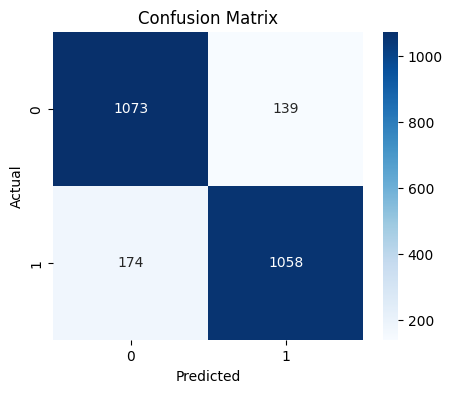

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [31]:
import numpy as np

sample_input = np.array([[ 
    10,    # LOC_BLANK
    20,    # BRANCH_COUNT
    300,   # LOC_CODE_AND_COMMENT
    50,    # LOC_COMMENTS
    15,    # CYCLOMATIC_COMPLEXITY
    12,    # DESIGN_COMPLEXITY
    8,     # ESSENTIAL_COMPLEXITY
    250,   # LOC_EXECUTABLE
    30,    # HALSTEAD_CONTENT
    20,    # HALSTEAD_DIFFICULTY
    4000,  # HALSTEAD_EFFORT
    0.02,  # HALSTEAD_ERROR_EST
    200,   # HALSTEAD_LENGTH
    0.8,   # HALSTEAD_LEVEL
    200,   # HALSTEAD_PROG_TIME
    3500,  # HALSTEAD_VOLUME
    120,   # NUM_OPERANDS
    80,    # NUM_OPERATORS
    60,    # NUM_UNIQUE_OPERANDS
    40,    # NUM_UNIQUE_OPERATORS
    320    # LOC_TOTAL
]])


In [ ]:
prediction = model.predict(sample_input)
probability = model.predict_proba(sample_input)[0][1]

print("Prediction:", prediction[0])
print("Defect Probability:", probability)


In [33]:
sample_dict = {
    'LOC_BLANK': 10,
    'BRANCH_COUNT': 20,
    'LOC_CODE_AND_COMMENT': 300,
    'LOC_COMMENTS': 50,
    'CYCLOMATIC_COMPLEXITY': 15,
    'DESIGN_COMPLEXITY': 12,
    'ESSENTIAL_COMPLEXITY': 8,
    'LOC_EXECUTABLE': 250,
    'HALSTEAD_CONTENT': 30,
    'HALSTEAD_DIFFICULTY': 20,
    'HALSTEAD_EFFORT': 4000,
    'HALSTEAD_ERROR_EST': 0.02,
    'HALSTEAD_LENGTH': 200,
    'HALSTEAD_LEVEL': 0.8,
    'HALSTEAD_PROG_TIME': 200,
    'HALSTEAD_VOLUME': 3500,
    'NUM_OPERANDS': 120,
    'NUM_OPERATORS': 80,
    'NUM_UNIQUE_OPERANDS': 60,
    'NUM_UNIQUE_OPERATORS': 40,
    'LOC_TOTAL': 320
}

sample_df = pd.DataFrame([sample_dict])

prediction = model.predict(sample_df)
probability = model.predict_proba(sample_df)[0][1]

print("Prediction:", prediction[0])
print("Defect Probability:", probability)


Prediction: 0
Defect Probability: 0.48


In [34]:
sample_dict_high = {
    'LOC_BLANK': 50,
    'BRANCH_COUNT': 100,
    'LOC_CODE_AND_COMMENT': 900,
    'LOC_COMMENTS': 100,
    'CYCLOMATIC_COMPLEXITY': 45,
    'DESIGN_COMPLEXITY': 40,
    'ESSENTIAL_COMPLEXITY': 30,
    'LOC_EXECUTABLE': 800,
    'HALSTEAD_CONTENT': 80,
    'HALSTEAD_DIFFICULTY': 60,
    'HALSTEAD_EFFORT': 15000,
    'HALSTEAD_ERROR_EST': 0.5,
    'HALSTEAD_LENGTH': 600,
    'HALSTEAD_LEVEL': 0.3,
    'HALSTEAD_PROG_TIME': 800,
    'HALSTEAD_VOLUME': 12000,
    'NUM_OPERANDS': 400,
    'NUM_OPERATORS': 350,
    'NUM_UNIQUE_OPERANDS': 150,
    'NUM_UNIQUE_OPERATORS': 120,
    'LOC_TOTAL': 1000
}

sample_df_high = pd.DataFrame([sample_dict_high])

prediction = model.predict(sample_df_high)
probability = model.predict_proba(sample_df_high)[0][1]

print("Prediction:", prediction[0])
print("Defect Probability:", probability)


Prediction: 1
Defect Probability: 0.57


In [35]:
sample_dict_low = {
    'LOC_BLANK': 2,
    'BRANCH_COUNT': 3,
    'LOC_CODE_AND_COMMENT': 80,
    'LOC_COMMENTS': 10,
    'CYCLOMATIC_COMPLEXITY': 2,
    'DESIGN_COMPLEXITY': 2,
    'ESSENTIAL_COMPLEXITY': 1,
    'LOC_EXECUTABLE': 60,
    'HALSTEAD_CONTENT': 10,
    'HALSTEAD_DIFFICULTY': 5,
    'HALSTEAD_EFFORT': 500,
    'HALSTEAD_ERROR_EST': 0.01,
    'HALSTEAD_LENGTH': 40,
    'HALSTEAD_LEVEL': 1.5,
    'HALSTEAD_PROG_TIME': 20,
    'HALSTEAD_VOLUME': 300,
    'NUM_OPERANDS': 25,
    'NUM_OPERATORS': 20,
    'NUM_UNIQUE_OPERANDS': 15,
    'NUM_UNIQUE_OPERATORS': 10,
    'LOC_TOTAL': 100
}

sample_df_low = pd.DataFrame([sample_dict_low])

prediction = model.predict(sample_df_low)
probability_defect = model.predict_proba(sample_df_low)[0][1]
probability_clean = model.predict_proba(sample_df_low)[0][0]

print("Prediction:", prediction[0])
print("Defect Probability:", probability_defect)
print("Clean Probability:", probability_clean)


Prediction: 1
Defect Probability: 0.51
Clean Probability: 0.49


In [36]:
sample_dict_very_low = {
    'LOC_BLANK': 1,
    'BRANCH_COUNT': 1,
    'LOC_CODE_AND_COMMENT': 20,
    'LOC_COMMENTS': 2,
    'CYCLOMATIC_COMPLEXITY': 1,
    'DESIGN_COMPLEXITY': 1,
    'ESSENTIAL_COMPLEXITY': 1,
    'LOC_EXECUTABLE': 15,
    'HALSTEAD_CONTENT': 2,
    'HALSTEAD_DIFFICULTY': 1,
    'HALSTEAD_EFFORT': 50,
    'HALSTEAD_ERROR_EST': 0.001,
    'HALSTEAD_LENGTH': 10,
    'HALSTEAD_LEVEL': 2,
    'HALSTEAD_PROG_TIME': 5,
    'HALSTEAD_VOLUME': 40,
    'NUM_OPERANDS': 5,
    'NUM_OPERATORS': 5,
    'NUM_UNIQUE_OPERANDS': 3,
    'NUM_UNIQUE_OPERATORS': 3,
    'LOC_TOTAL': 30
}

sample_df = pd.DataFrame([sample_dict_very_low])

prediction = model.predict(sample_df)
probs = model.predict_proba(sample_df)[0]

print("Prediction:", prediction[0])
print("Defect Probability:", probs[1])
print("Clean Probability:", probs[0])


Prediction: 0
Defect Probability: 0.27
Clean Probability: 0.73


In [37]:
# Training accuracy
train_accuracy = model.score(X_train, y_train)

# Testing accuracy
test_accuracy = model.score(X_test, y_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 0.8719312602291326
